Assignment 5

In [1]:
import pandas as pd
import numpy as np
import requests
import json

from bs4 import BeautifulSoup as bf
from typing import Tuple, List, Dict

In [2]:
api_key = '{Api_key}'
path=r"C:\Users\David Sofer\Desktop\David\python"
fileName="\destinations_LP_crawler_Ex5.csv"
try:
    df=pd.read_csv(path+fileName,encoding='ISO-8859-1')
except:
    print("File not found, try again")
df

,city,city_LP
0,Antalya,mediterranean-coast/antalya
1,Athens,Athens
2,Ayia-napa,the-republic-of-cyprus/Agia-napa
3,Bangkok,Bangkok
4,Barcelona,Barcelona
...,...,...
71,Venice,Venice
72,Vienna,Vienna
73,Warsaw,Warsaw
74,Zakynthos,Zakynthos


In [3]:
def get_city_data(address: list, api_key: str):
    url = "https://maps.googleapis.com/maps/api/geocode/json?address=%s&key=%s" % (address,api_key)
    try:
        response = requests.get(url)
        if not response.status_code == 200:
            print("HTTP error", response.status_code)
        else:
            try:
                response_data = response.json()
            except:
                print("Response not in valid JSON format")
    except:
        print("requests.get doesn't work properly")

    return response_data

In [4]:
countries_list=[]
for row in df.itertuples(index=True, name='df'):
    get_country = get_city_data(row.city, api_key)
    if get_country['status']=='ZERO_RESULTS':
        countries_list.append("NULL")
        continue
    countries_list.append(get_country['results'][0]['formatted_address'].split(',')[-1].strip().replace(" ",""))
countries_list

['Turkey',
 'Greece',
 'Cyprus',
 'Thailand',
 'Spain',
 'Switzerland',
 'Georgia',
 'China',
 'Germany',
 'USA',
 'Slovakia',
 'Belgium',
 'Romania',
 'Hungary',
 'Bulgaria',
 'Mexico',
 'Italy',
 'Thailand',
 'Germany',
 'Greece',
 'Spain',
 'Greece',
 'NULL',
 'India',
 'Germany',
 'Ireland',
 'Croatia',
 'Germany',
 'Italy',
 'Germany',
 'Switzerland',
 'China',
 'Germany',
 'Austria',
 'Turkey',
 'Greece',
 'Thailand',
 '02000',
 'Cyprus',
 'USA',
 'Cyprus',
 'Portugal',
 'Slovenia',
 'USA',
 'Spain',
 'Philippines',
 'France',
 'Mexico',
 'USA',
 'Italy',
 'Russia',
 'India',
 'Germany',
 'Greece',
 'Italy',
 'France',
 '65000',
 'France',
 'Thailand',
 'Greece',
 'Italy',
 'Austria',
 'USA',
 'China',
 'Bulgaria',
 'Russia',
 'Germany',
 'Taiwan',
 'Georgia',
 'Greece',
 'Canada',
 'Italy',
 'Austria',
 'Poland',
 'Greece',
 'Switzerland']

In [5]:
df.insert(2, 'Countries', countries_list)

In [6]:
from bs4 import BeautifulSoup as bf

def get_country_description(city_url):
    try:
        response = requests.get(city_url)
        if not response.status_code == 200:
            print("HTTP error", response.status_code)
        else:
            try:
                soup = bf(response.content,'html.parser')
                for div in soup.find_all("div", class_ = "readMore_content___5EuR relative overflow-hidden max-h-96 is-max wysiwyg"):
                    return div.get_text()
            except:
                print("Response not in valid HTML format")
    except:
        print("requests.get doesn't work properly")

In [7]:
df.insert(3, 'Description', "NULL")

In [8]:
for index, row in df.iterrows():
    city_url = "https://www.lonelyplanet.com"
    city_url +="/" +row["Countries"]+ "/" + row["city_LP"]
    row["Description"]=get_country_description(city_url)

HTTP error 403
HTTP error 403
HTTP error 403


In [9]:
data = {'City': df['city'], 'Country': df['Countries'], 'Description': df['Description']}
detailed_frame = pd.DataFrame(data)
detailed_frame.to_csv(r"C:\Users\David Sofer\Desktop\David\python\LP_destinations.csv")


In [10]:
detailed_frame

,City,Country,Description
0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...
1,Athens,Greece,"With equal measures of grunge and grace, Athen..."
2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...
3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir..."
4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...
...,...,...,...
71,Venice,Italy,Imagine the audacity of building a city of mar...
72,Vienna,Austria,Baroque streetscapes and imperial palaces set ...
73,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi..."
74,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant..."


Assignment 6 
Formating the dataframe created above

In [11]:
detailed_frame.insert(3, 'num_of_words', "NULL")
detailed_frame['num_of_words'] = detailed_frame.Description.apply(lambda x: len(str(x).split(' ')))


In [90]:
detailed_frame.insert(4, 'No_punct_description', "NULL")
detailed_frame["No_punct_description"] = detailed_frame['Description'].str.replace('[^\w\s]','')

ValueError: cannot insert No_punct_description, already exists

In [20]:
detailed_frame.insert(5, 'has_restaurants', "NULL")
word = "restaurant"
detailed_frame['has_restaurants']=detailed_frame['Description'].apply(lambda x: (str(x).count(word)))

In [21]:
detailed_frame.insert(6, 'has_museums', "NULL")
word = "museum"
detailed_frame['has_museums']=detailed_frame['Description'].apply(lambda x: (str(x).count(word)))

In [22]:
detailed_frame.insert(7, 'has_beaches', "NULL")
words = ['beach', 'ocean', 'sea']
detailed_frame['has_beaches']=detailed_frame['Description'].apply(lambda x : sum([str(x).count(word) for word in words]))

In [23]:
detailed_frame

,City,Country,Description,num_of_words,No_punct_description,has_restaurants,has_museums,has_beaches
0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...,112,Once seen simply as the gateway to the Turkish...,0,1,1
1,Athens,Greece,"With equal measures of grunge and grace, Athen...",393,With equal measures of grunge and grace Athens...,1,0,2
2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...,147,Endless bluesky days and a coastline riddled w...,0,0,2
3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir...",390,Same same but different This Thailish Tshirt p...,1,0,0
4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...,419,Barcelona is an enchanting seaside city with b...,1,2,7
...,...,...,...,...,...,...,...,...
71,Venice,Italy,Imagine the audacity of building a city of mar...,412,Imagine the audacity of building a city of mar...,0,0,2
72,Vienna,Austria,Baroque streetscapes and imperial palaces set ...,410,Baroque streetscapes and imperial palaces set ...,1,3,0
73,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi...",406,A phoenix arisen from the ashes Polands capita...,1,2,1
74,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant...",118,Zakynthos also known by its Italian name Zante...,0,0,0


In [91]:
detailed_frame.to_csv(r"C:\Users\David Sofer\Desktop\David\python\task6.csv")

In [32]:
detailed_frame['num_of_words'].agg(['mean'])

mean    263.894737
Name: num_of_words, dtype: float64

The average number of word in the description column is 263.89

In [68]:
detailed_frame['num_of_words'].max()

515

In [70]:
x = detailed_frame['num_of_words'].idxmax()
detailed_frame['City'].iloc[[x]]

28    Florence
Name: City, dtype: object

<AxesSubplot:>

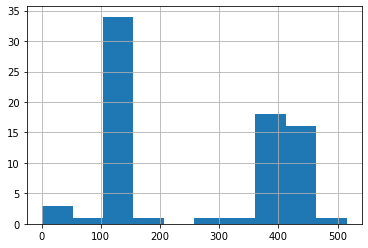

In [76]:
detailed_frame['num_of_words'].hist()

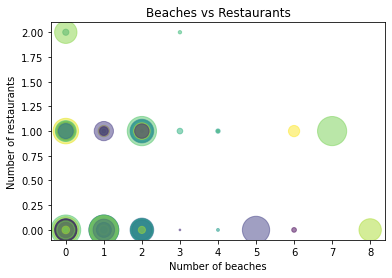

In [88]:
import matplotlib.pyplot as plt
x = detailed_frame['has_beaches']
y= detailed_frame['has_restaurants']
colors = np.random.rand(76)
area = (30 * np.random.rand(76))**2
plt.scatter(x, y, alpha=0.5, c = colors, s = area)
plt.xlabel('Number of beaches')
plt.ylabel('Number of restaurants')
plt.title('Beaches vs Restaurants')
plt.show()

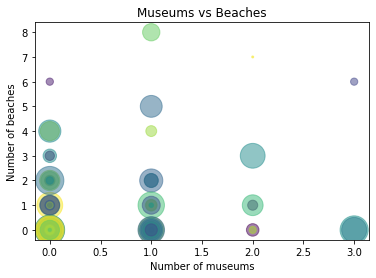

In [89]:
x = detailed_frame['has_museums']
y= detailed_frame['has_beaches']
colors = np.random.rand(76)
area = (30 * np.random.rand(76))**2
plt.scatter(x, y, alpha=0.5, c = colors, s = area)
plt.xlabel('Number of museums')
plt.ylabel('Number of beaches')
plt.title('Museums vs Beaches')
plt.show()